In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import out grid search module
from sklearn.model_selection import GridSearchCV


def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, # the model to grid search
                        params, # the parameter set to try 
                        cv=4,
                        error_score=0.) # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y) # fit the model and parameters
    # our classical metric for performance
    print("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [3]:
np.random.seed(123)
credit_card_default = pd.read_csv('/home/ubuntu/project/credit_card_default.csv.csv', index_col=0, header=1)

In [4]:
credit_card_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
credit_card_default.shape

(30000, 24)

In [25]:
credit_card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [26]:
credit_card_default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
X = credit_card_default.drop('default payment next month', axis=1)
y = credit_card_default['default payment next month']

In [30]:
y.value_counts(normalize=True)
# we need the accuracy more than 77.88%

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [7]:
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Set up some parameters for our grid search
# We will start with four different machine learning model parameters

# Logistic Regression
lr_params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}

# KNN
knn_params = {'n_neighbors': range(1,8)}

# Decision Tree
tree_params = {'max_depth':[None, 1, 3, 5, 7,9,11]}

# Random Forest
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7,9,11]}

In [9]:
# instantiate the four machine learning models
# no need to use pipeline as we are not using and feature transformation like standazidation or imputer
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [10]:
print('logistic regression')
get_best_model_and_accuracy(lr, lr_params, X, y)

logistic regression
Best Accuracy: 0.8094
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Average Time to Fit (s): 0.588
Average Time to Score (s): 0.001


In [11]:
print('KNN')
get_best_model_and_accuracy(knn, knn_params, X, y)

KNN
Best Accuracy: 0.7705333333333333
Best Parameters: {'n_neighbors': 6}
Average Time to Fit (s): 0.029
Average Time to Score (s): 0.598


In [12]:
# bring in some familiar modules for dealing with this sort of thing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# construct pipeline parameters based on the parameters
# for KNN on its own
knn_pipe_params = {'classifier__n_neighbors' : range(1,8)}

# KNN requires a standard scalar due to using Euclidean distance # as the main equation for predicting observations
knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])

# quick to fit, very slow to predict
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

#print knn_pipe_params  # {'classifier__n_neighbors': [1, 3, 5, 7]} 

Best Accuracy: 0.8001666666666667
Best Parameters: {'classifier__n_neighbors': 6}
Average Time to Fit (s): 0.043
Average Time to Score (s): 5.325


In [13]:
print('D Tree')
get_best_model_and_accuracy(d_tree, tree_params, X, y)

D Tree
Best Accuracy: 0.8204333333333333
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.224
Average Time to Score (s): 0.002


In [14]:
print('Random Forest')
get_best_model_and_accuracy(forest, forest_params, X, y)

Random Forest
Best Accuracy: 0.8197333333333333
Best Parameters: {'max_depth': 9, 'n_estimators': 50}
Average Time to Fit (s): 1.489
Average Time to Score (s): 0.05


# Statistical-based feature selection
     Pearson correlations
     hypothesis testing
    

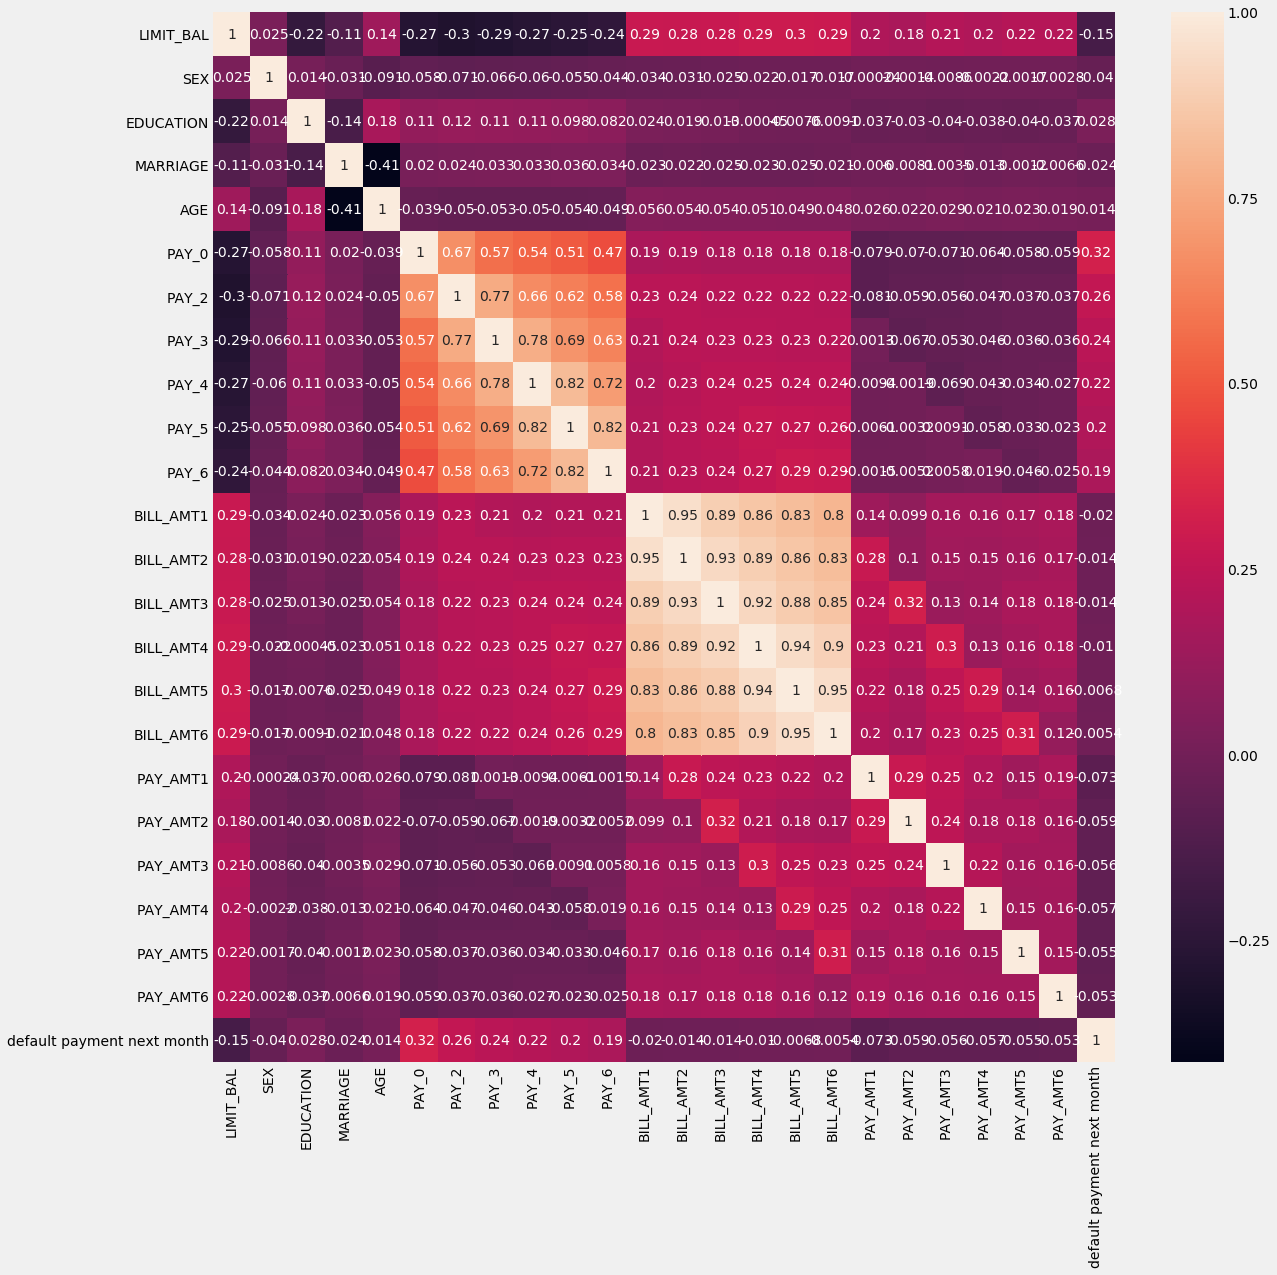

In [23]:
plt.figure(figsize=(18,18))
sns.heatmap(credit_card_default.corr(), annot=True)

In [24]:
credit_card_default.corr()['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [25]:
credit_card_default.corr()['default payment next month'].abs() > 0.2

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month     True
Name: default payment next month, dtype: bool

In [27]:
credit_card_default.corr()[credit_card_default.corr()['default payment next month'].abs() > 0.2]['default payment next month']

PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [32]:
highly_correlated_features = credit_card_default.columns[credit_card_default.corr()['default payment next month'].abs() > 0.2]
# drop the response variable
highly_correlated_features = highly_correlated_features.drop('default payment next month')
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [33]:
# only include the five highly correlated features
# barely worse, but about 20x faster to fit the model
X_subsetted = X[highly_correlated_features]

get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y) 

Best Accuracy: 0.8198
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.009
Average Time to Score (s): 0.001


In [46]:
from sklearn.base import TransformerMixin, BaseEstimator

class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        # store the response series
        self.response = response
        # store the threshold that we wish to keep
        self.threshold = threshold
        # initialize a variable that will eventually
        # hold the names of the features that we wish to keep
        self.cols_to_keep = cols_to_keep
        
    def transform(self, X):
        # the transform method simply selects the appropiate
        # columns from the original dataset
        return X[self.cols_to_keep]
        
    def fit(self, X, *_):
        # create a new dataframe that holds both features and response
        df = pd.concat([X, self.response], axis=1)
        # store names of columns that meet correlation threshold
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() > self.threshold]
        # only keep columns in X, for example, will remove response variable
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self

In [44]:
df1 = pd.concat([X, y], axis=1)

In [36]:
ols_to_keep=[]

In [39]:
cols_to_keep = df1.columns[df1.corr()[df1.columns[-1]].abs() > 0.2]
cols_to_keep

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'default payment next month'],
      dtype='object')

In [42]:
cols_to_keep = [c for c in cols_to_keep if c in X.columns]
cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [45]:
X[cols_to_keep].head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
ID,,,,,
1,2,2,-1,-1,-2
2,-1,2,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,-1,0,-1,0,0


In [47]:
# instantiate our new feature selector
ccc = CustomCorrelationChooser(threshold=.2, response=y)
ccc.fit(X)
ccc.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [48]:
ccc.transform(X).head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
ID,,,,,
1,2,2,-1,-1,-2
2,-1,2,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,-1,0,-1,0,0


In [56]:
# instantiate our feature selector with the response variable set
from copy import deepcopy
ccc = CustomCorrelationChooser(response=y)

# make our new pipeline, including the selector
ccc_pipe = Pipeline([('correlation_select', ccc), 
 ('classifier', d_tree)])

# make a copy of the decisino tree pipeline parameters
tree_pipe_params = {'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11]}
ccc_pipe_params = deepcopy(tree_pipe_params)

# update that dictionary with feature selector specific parameters
ccc_pipe_params.update({
 'correlation_select__threshold':[0, .1, .2, .3]})

print(ccc_pipe_params)  #{'correlation_select__threshold': [0, 0.1, 0.2, 0.3], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

# better than original (by a little, and a bit faster on 
# average overall
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y) 

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11], 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8206
Best Parameters: {'classifier__max_depth': 5, 'correlation_select__threshold': 0.1}
Average Time to Fit (s): 0.103
Average Time to Score (s): 0.002


In [58]:
# check the threshold of .1
ccc = CustomCorrelationChooser(threshold=0.1, response=y)
ccc.fit(X)

# check which columns were kept
ccc.cols_to_keep

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']